# __Seaborn Visualization: From Basics to Advanced__

## __Agenda__

In this lesson, we will cover the following concepts with the help of examples:
- Introduction to Seaborn
- Plotting a Graphs Using Seaborn
- Violin Plot
- Pair Plot
- Heatmap
- Joint plot
- Swarm plot
- Plotting 3D Graphs for Multiple Columns Using Seaborn

## __1. Introduction to Seaborn__
Seaborn is a statistical data visualization library in Python based on Matplotlib.
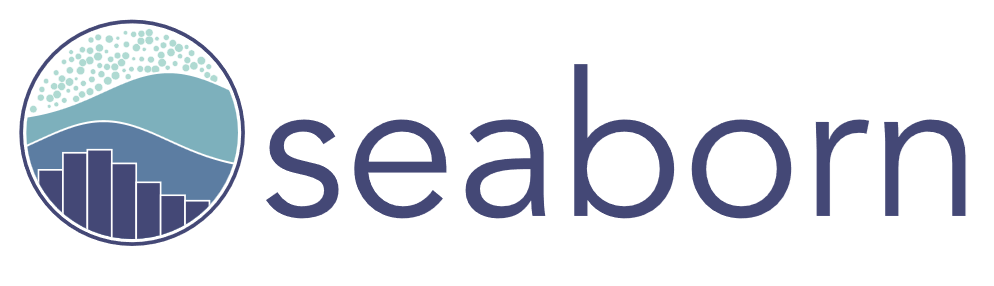
 
- It provides an interface for creating attractive and informative statistical graphics. 
- It comes with several built-in themes and color palettes to make it easy to create aesthetically pleasing visualizations.
- It is particularly well-suited for exploring complex datasets with multiple variables.



The below code leverages Seaborn's functionality to create a specialized line plot for visualizing fMRI data with distinct regions and events. 
- Seaborn simplifies the process of creating complex visualizations and provides additional features for customization and exploration of data patterns.







In [1]:
import seaborn as sns

In [2]:
sns.get_dataset_names() # get the names of inbuilt datasets in seaborn for practice and demo

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
len(sns.get_dataset_names())

22

In [4]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
sns.set_theme()

fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [7]:
fmri['region'].value_counts()

region
parietal    532
frontal     532
Name: count, dtype: int64

In [8]:
fmri['event'].value_counts()

event
stim    532
cue     532
Name: count, dtype: int64

In [ ]:
# sns.<plot_function_name>(data=df,x='column_name',y='column_name')

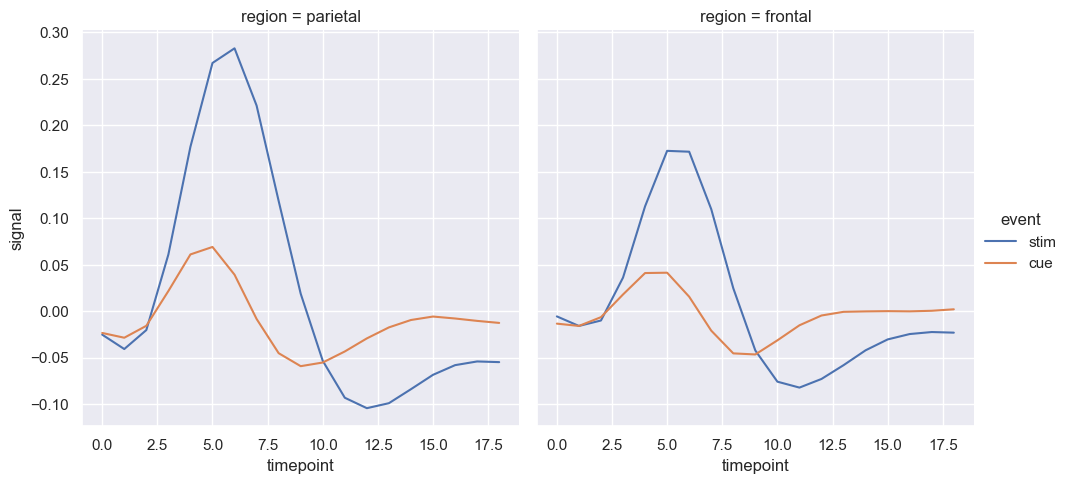

In [9]:
sns.relplot( # relplot = relation plot, alternatively use sns.lineplot()
    data=fmri, 
    kind="line",
    x="timepoint", 
    y="signal", 
    col="region", # column
    hue="event", # color
    errorbar=None
); # col_wrap =4

## __2. Plotting Graphs Using Seaborn__

__Note:__ We have previously explored these plot types using the Matplotlib library. This example serves to illustrate how to achieve similar visualizations using Seaborn for its enhanced styling and simplicity.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Scatter Plot

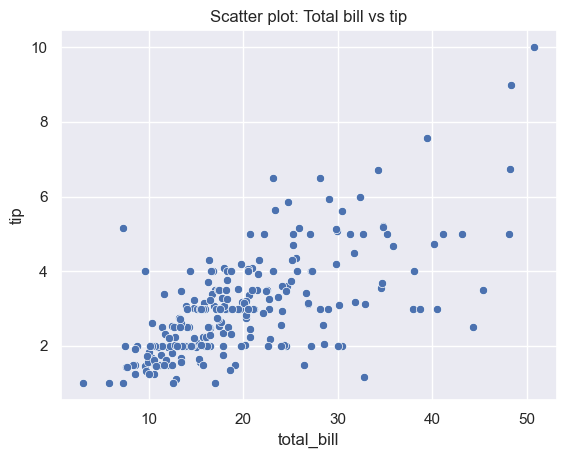

In [11]:
# Scatter Plot
sns.scatterplot(x='total_bill', y='tip', data=tips) # sns.relplot(kind="scatter"...)
plt.title('Scatter plot: Total bill vs tip');

## Line Plot

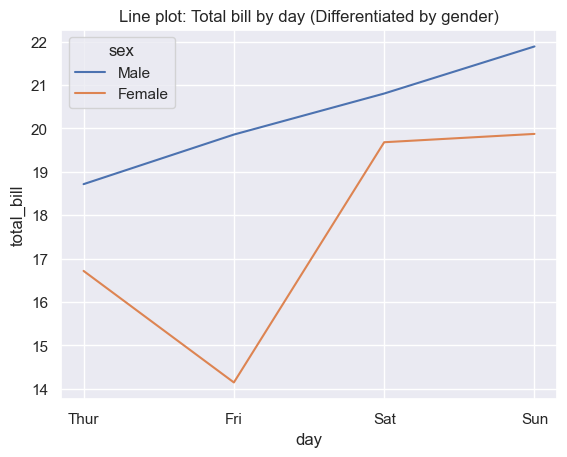

In [12]:
# Line Plot
sns.lineplot(x='day', y='total_bill', data=tips, hue='sex',errorbar=None)
plt.title('Line plot: Total bill by day (Differentiated by gender)');
# plt.show()

In [13]:
len(tips)

244

## Histogram

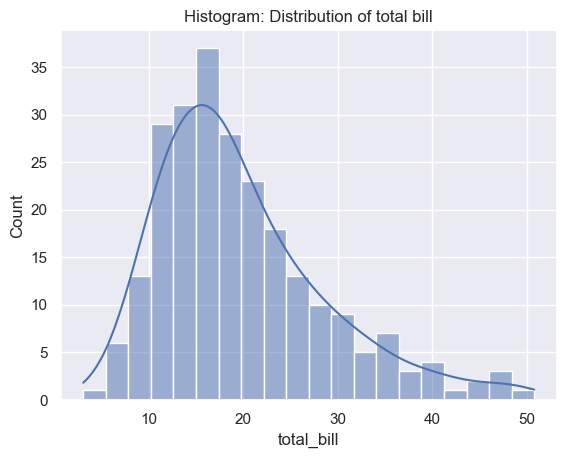

In [14]:
# Histogram
sns.histplot(tips['total_bill'], bins=20, kde=True) # kde = kernel density estimation or the curve
plt.title('Histogram: Distribution of total bill');
# plt.show()

## Density Plot

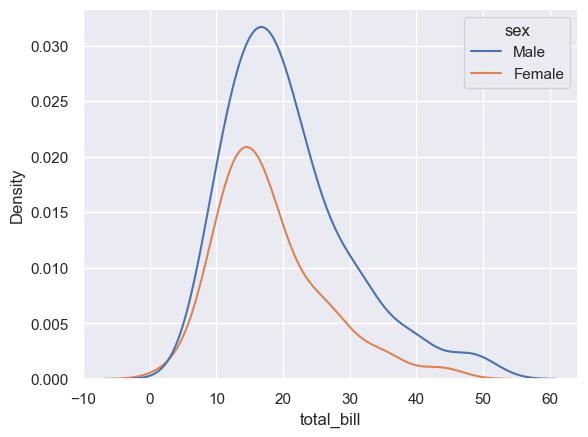

In [16]:
sns.kdeplot(data=tips, x='total_bill', hue='sex', fill=False);

## Boxplot

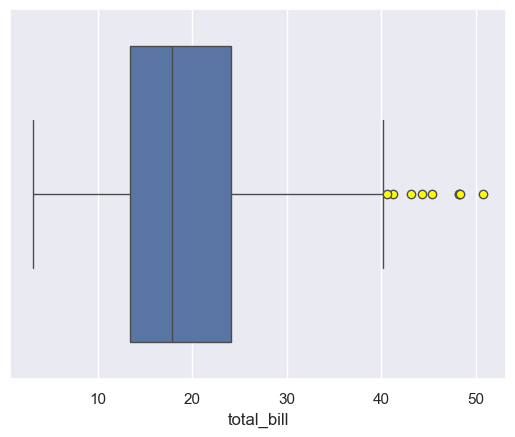

In [17]:
sns.boxplot(x='total_bill', data=tips);

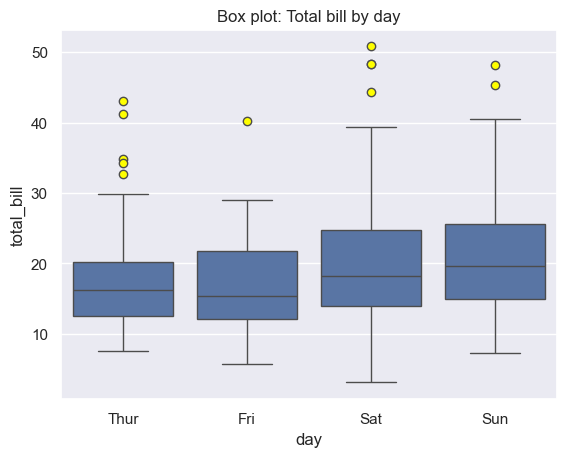

In [18]:
# Box Plot
sns.boxplot(x='day', y='total_bill', data=tips)
plt.title('Box plot: Total bill by day');
# plt.show()

### Bar Plot

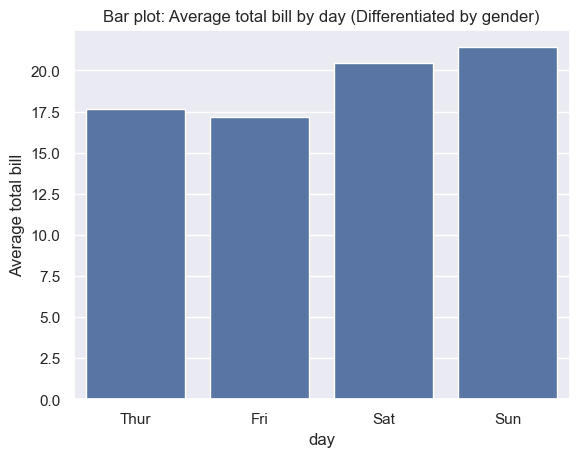

In [22]:
# Bar Plot
sns.barplot(x='day', 
            y='total_bill', 
            data=tips, 
            # hue='sex',
            errorbar=None)
plt.title('Bar plot: Average total bill by day (Differentiated by gender)')
plt.ylabel('Average total bill');

## __3. Violin Plot__
A violin plot combines the features of a kernel density plot and a box plot, showing the distribution of a numerical variable for different categories.
- This plot visualizes the distribution of total bills for each day, highlighting data point densities and key statistical measures such as the median and interquartile range.

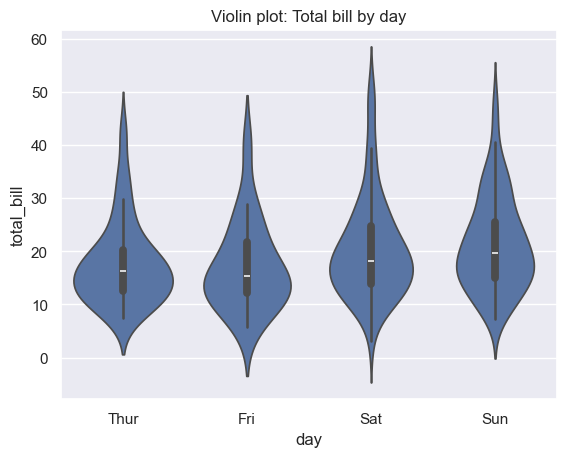

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample dataset
tips = sns.load_dataset('tips')

# Violin Plot
sns.violinplot(x='day', y='total_bill', data=tips)
plt.title('Violin plot: Total bill by day');

## __4. Pair Plot:__

A pair plot displays the pairwise relationships between numerical variables in a dataset through scatter plots and distributions, differentiating categories using colors.
- It is useful for understanding how different numerical variables relate to each other and how these relationships vary based on gender ('sex' variable in this case).

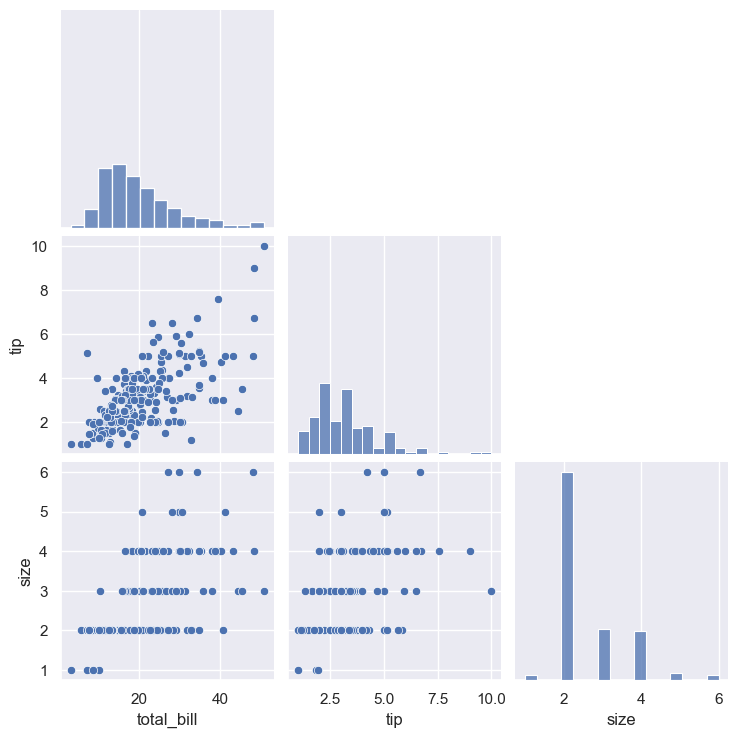

In [25]:
# Pair Plot
sns.pairplot(data=tips,corner=True);
# plt.title('Pair Plot: Relationships across variables (Differentiated by gender)')
# plt.show()

In [27]:
tips.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


## __5. Heatmap:__

A heatmap visualizes the correlation matrix of numerical variables in a dataset, using color gradations to represent the strength and direction of correlations.

- It allows for the quick identification of relationships between variables, with warmer colors indicating stronger correlations and cooler colors indicating weaker or negative correlations.

In [28]:
# Heatmap
correlation_matrix = tips.corr(numeric_only=True)
correlation_matrix

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


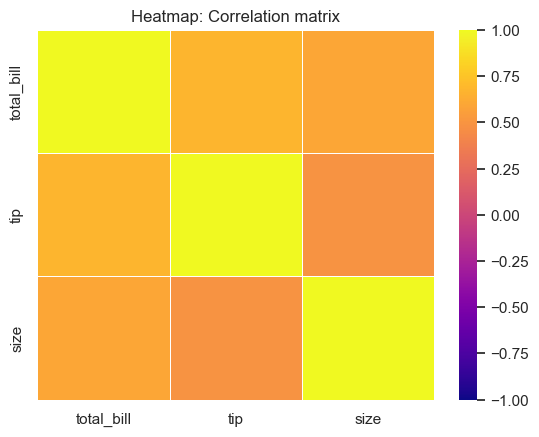

In [30]:
sns.heatmap(data=correlation_matrix,
           annot=False, # displays the correlation coefficients
           vmin=-1, # min value of the color scale
           vmax=1, # max value of the color scale
           cmap='plasma', # color scheme
           linewidth=0.5,
           linecolor='white');
plt.title('Heatmap: Correlation matrix');

## __6. Joint Plot__

A joint plot showcases the bivariate distribution of two numerical variables, representing point density with hexagonal bins.
- It helps identify patterns and concentrations in the relationship between __total_bill__ and __tip__, with darker hexagons indicating higher point density.

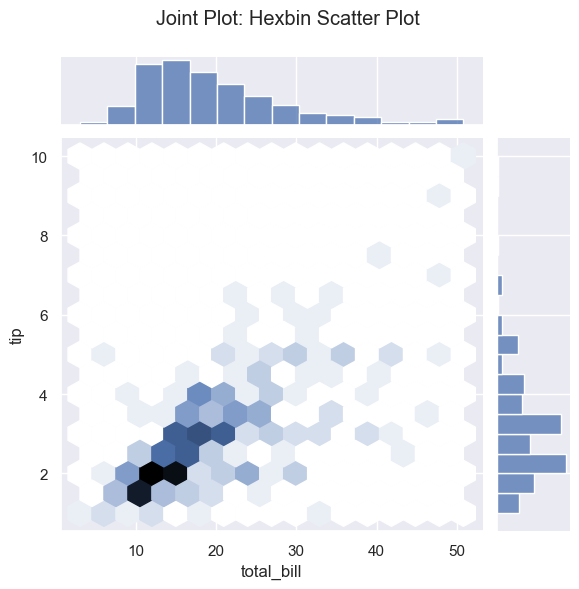

In [33]:
# Create a Joint Plot
joint = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
# Adjust the title position
plt.subplots_adjust(top=0.9)  # Adjust the top space to make room for the title
# Set the title for the figure
joint.fig.suptitle('Joint Plot: Hexbin Scatter Plot');

## __7. Swarm Plot__

A swarm plot is a categorical scatter plot that arranges individual data points without overlapping.
- It is useful for visualizing the distribution of total_bill across different days. Each point represents an individual entry.
- It helps identify patterns and concentrations without losing granularity due to point overlap.

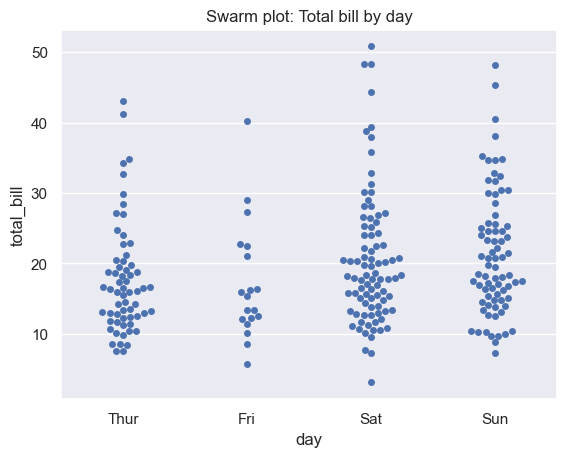

In [34]:
# Swarm Plot
sns.swarmplot(x='day', y='total_bill', data=tips)
plt.title('Swarm plot: Total bill by day');

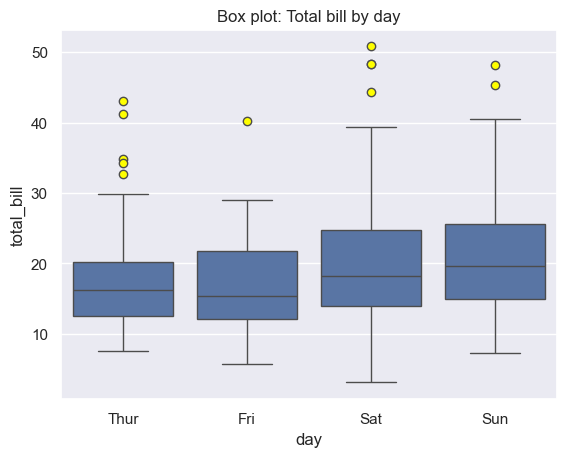

In [41]:
# boxplot of total_bill vs day
bxp = sns.boxplot(x='day', y='total_bill', data=tips)
plt.title('Box plot: Total bill by day');

In [43]:
# save the fig as a jpeg file
plt.savefig('boxplot.jpg')

<Figure size 640x480 with 0 Axes>

## __Introduction to Plotly__
Plotly is a versatile and interactive data visualization library in Python that enables the creation of interactive and web-based visualizations. 
- It allows users to create a wide range of charts, graphs, and dashboards for exploratory data analysis and presentation purposes.
- It supports both static and dynamic visualizations and is particularly well-suited for creating interactive plots that can be embedded in web applications and notebooks.
- Explore others like bokeh, altair

In [36]:
import plotly.express as px # pip install plotly

# Create a sample DataFrame
df = px.data.iris()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [37]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

/Users/balaji/miniforge3/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



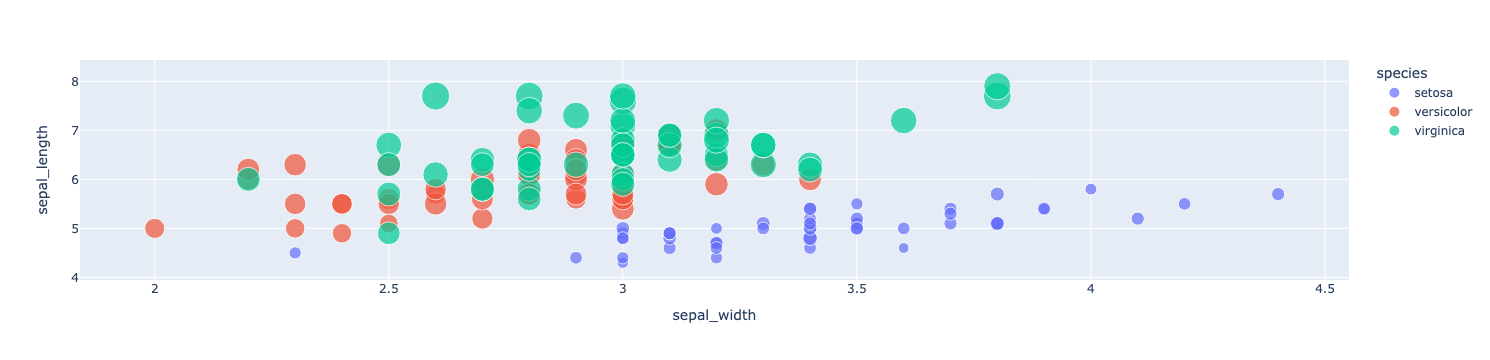

In [40]:
# Create a scatter plot
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", size="petal_length")

# Show the interactive plot
fig.show()

This is a markdown cell and will not be treated as code.

# __Assisted Practice__

## __Problem Statement:__
Analyze the housing dataset using various types of plots from the Seaborn library to gain insights into the data.Use the`housing_data.csv`

## __Steps to Perform:__
- Create a violin plot for a feature like SalePrice to visualize its distribution and understand its characteristics.
- Use a pair plot to visualize the relationships between different numerical variables like LotArea, YearBuilt, and SalePrice.
- Create a heatmap of the correlation matrix to understand the relationships between different numerical features.
- Use a joint plot to visualize the relationship between two numerical variables and their individual distributions, for example, LotArea and SalePrice.
- Create a swarm plot for a categorical variable like Neighborhood against SalePrice to understand the distribution of prices in each neighborhood.